In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


data = pd.read_csv('data2.txt',names=['x1','x2','y'])
x = data.iloc[:,[0,1]].to_numpy()
y = data.iloc[:,[2]].to_numpy()

bias = np.ones((118,1))
x = np.hstack((bias,x)) 

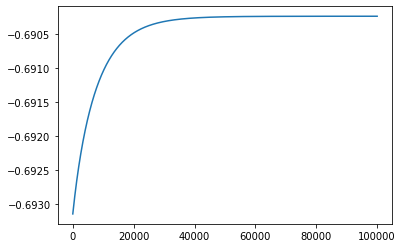

In [5]:
max_iter = 100000
learning_rate = 0.001

w = np.array([[0., 0., 0.]]).T
p = 1/(1 + np.exp(-np.dot(x,w)))
gradient = np.array([[0., 0., 0.]]).T
ce = [];
for iteration in range(0,max_iter):
    
    p = 1/(1 + np.exp(-np.dot(x,w)))
    err = 0;
    for i in range(0,x.shape[0]):
        a = float(y[i,0])
        err += a*np.log(p[i,0])+(1-a)*np.log(1-p[i,0])
    err /= x.shape[0]  
    ce.append(err)
    #ce.append(-err)
    for i in range(0,x.shape[0]):
        gradient += x[i,:].reshape(1,x[0,:].shape[0]).T * (p[i,0]-float(y[i,0]))   
    gradient /= x.shape[0]  
    w = w - learning_rate*gradient
x_axis = range(1,max_iter+1)
plt.plot(x_axis,ce)
plt.show()

In [11]:
w

array([[-0.01439389],
       [-0.3025369 ],
       [-0.01750751]])

In [127]:
predicted = p = 1/(1 + np.exp(-np.dot(x,w)))
correct = predicted[:,0] >= 0.5
correct = correct.sum()
print('Accuracy(%) : \n{0}'.format(100*correct/x.shape[0]))

Accuracy(%) : 
57.6271186440678


# code for polynomial 6 (p4,p5)

In [2]:
def PolyFeatures(x1, x2,degree):
    out = [1]
    for i in range(1,degree+1):
        for j in range(0,i+1):
            out.append( float((x1**(i-j)))*float((x2**j)))
    return out

In [3]:
basis = [];
for k in range(0, x.shape[0]):
    basis.append(PolyFeatures(x[k,1], x[k,2], 6))

basis = np.array(basis)

In [14]:
max_iter = 100000
learning_rate = 0.001
lambda1 = 100

#w = np.zeros((28,1))

# print((basis.shape))
w = np.zeros((28, 1 ))

for i in range(max_iter):
    s=0
    for j in range(0, basis.shape[0]):
        p = (1 / (1 + np.exp(-1 * w.T.dot(basis[j, :]))))
        s += basis[j, :] * (p - y[j])
        
    #print(s.shape)
    temp = lambda1 * w
    temp[0, 0] = 0
    w = w - learning_rate * (s.reshape(28, 1) + temp) / basis.shape[0]
print(w)

[[ 0.0178064 ]
 [-0.01742011]
 [ 0.00591487]
 [-0.05480674]
 [-0.01318655]
 [-0.03818781]
 [-0.01838701]
 [-0.00769502]
 [-0.0089011 ]
 [-0.02263798]
 [-0.0432612 ]
 [-0.00236563]
 [-0.01408516]
 [-0.0035112 ]
 [-0.04121644]
 [-0.02093761]
 [-0.00470447]
 [-0.00357825]
 [-0.00629952]
 [-0.00501714]
 [-0.03184292]
 [-0.03405193]
 [-0.00107871]
 [-0.0069992 ]
 [-0.00038812]
 [-0.00795188]
 [-0.00155656]
 [-0.04093422]]


In [15]:
predicted = p = 1/(1 + np.exp(-np.dot(basis,w)))
correct = 0
for i in range(basis.shape[0]):
    if predicted[i,0] >= 0.5 and y[i]==1:
        correct += 1
    elif predicted[i,0] < 0.5 and y[i]==0:
        correct += 1
        
print('Accuracy(%) : \n{0}'.format(100*correct/basis.shape[0]))

Accuracy(%) : 
66.10169491525424


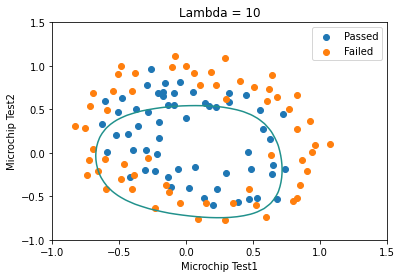

In [13]:

u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
         z[i,j] = np.dot(PolyFeatures(u[i],v[j],6),w)

data_passed1 = data[data['y']==1][['x1']].values
data_passed2 = data[data['y']==1][['x2']].values
data_failed1 = data[data['y']==0][['x1']].values
data_failed2 = data[data['y']==0][['x2']].values
passed = plt.scatter(data_passed1, data_passed2)
failed = plt.scatter(data_failed1, data_failed2)

plt.contour(u,v,z,0)
plt.title('Lambda = 10')
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

In [119]:
data_passed.shape

(1, 58)

In [81]:
data.shape

(118, 3)

In [235]:
w

array([[-1.81970068e-01],
       [-7.84010057e-02],
       [ 3.79358506e-03],
       [-4.96003962e-02],
       [ 2.40001159e-03],
       [-1.16129226e-04],
       [-3.13796907e-02],
       [ 1.51836733e-03],
       [-7.34691546e-05],
       [ 3.55494786e-06],
       [-1.98523613e-02],
       [ 9.60595091e-04],
       [-4.64802607e-05],
       [ 2.24903776e-06],
       [-1.08824064e-07],
       [-1.25595964e-02],
       [ 6.07720484e-04],
       [-2.94057369e-05],
       [ 1.42285374e-06],
       [-6.88475440e-08],
       [ 3.33132224e-09],
       [-7.94582865e-03],
       [ 3.84474364e-04],
       [-1.86035395e-05],
       [ 9.00168419e-07],
       [-4.35563987e-08],
       [ 2.10756102e-09],
       [-1.01978436e-10]])

In [ ]:
#z = pd.DataFrame(z)
#display(z)
#z = z.values
